In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

%matplotlib inline
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
columns = [
    "duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted",
    "num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count",
    "srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "label",
]

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv("data/kddcup.data.corrected", names=columns)

<IPython.core.display.Javascript object>

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


<IPython.core.display.Javascript object>

In [5]:
df.shape

(4898431, 42)

<IPython.core.display.Javascript object>

In [6]:
df = df[df.service == "http"].drop(columns=["service"], axis=1)

<IPython.core.display.Javascript object>

## Prepare Dataset

#### Encode categorical columns

In [7]:
for column in df.columns:
    if df[column].dtype == "object":
        encoder = LabelEncoder()
        encoder.fit(df[column])
        df[column] = encoder.transform(df[column])

<IPython.core.display.Javascript object>

#### Shuffle dataset

In [8]:
df = df.sample(frac=1)

<IPython.core.display.Javascript object>

In [9]:
labels = df.label
df_X = df.drop(columns=["label"], axis=1)

<IPython.core.display.Javascript object>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df_X, labels, test_size=0.1, random_state=42
)

<IPython.core.display.Javascript object>

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((560781, 40), (560781,), (62310, 40), (62310,))

<IPython.core.display.Javascript object>

## IsolationForest model

In [12]:
isolation_forest = IsolationForest(random_state=42)

<IPython.core.display.Javascript object>

In [13]:
isolation_forest.fit(X_train)

IsolationForest(random_state=42)

<IPython.core.display.Javascript object>

#### Evaluate on test set

In [14]:
test_anomaly_scores = isolation_forest.decision_function(X_test)

<IPython.core.display.Javascript object>

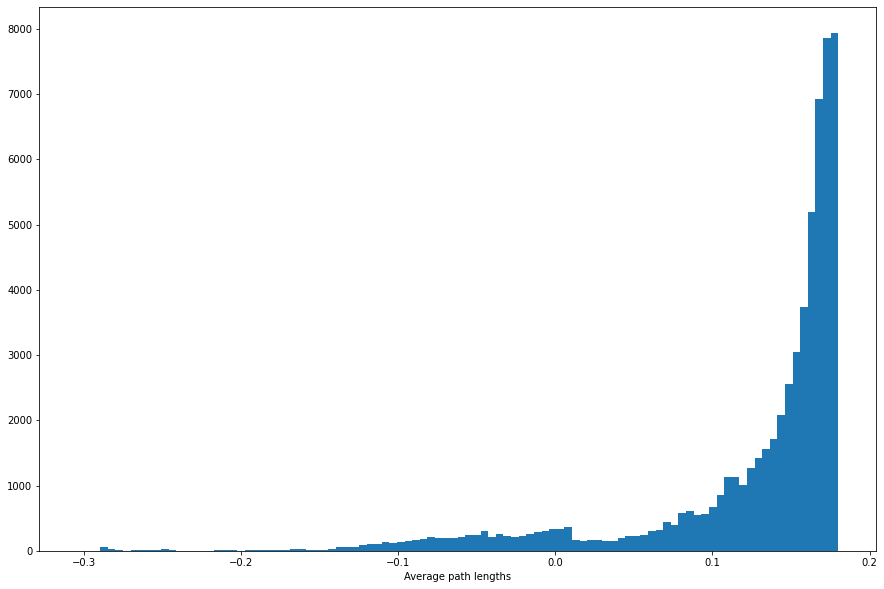

<IPython.core.display.Javascript object>

In [15]:
plt.figure(figsize=(15, 10))
plt.hist(test_anomaly_scores, bins=100)
plt.xlabel("Average path lengths")
plt.show()

In [16]:
matches = y_test == list(encoder.classes_).index("normal.")

<IPython.core.display.Javascript object>

In [17]:
test_anomalies = test_anomaly_scores > -0.19

<IPython.core.display.Javascript object>

In [18]:
roc_auc_score(test_anomalies, matches)

0.9770100210715557

<IPython.core.display.Javascript object>